Calculate several parameters for the latest daily close BTC-to-USD data, from 2023-01-01 up to 2023-01-24.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'BTC-USD.csv'
rates = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype=float)

# Extract the adjust close data
q3_rates = rates[181:273, 5]  # indexing starts from 0

I read BTC-USD file and load Q3 2023 with Adj Close data.

In [17]:
# Calculate aggregates
mean = np.mean(q3_rates)
minimum = np.min(q3_rates)
first_quartile = np.percentile(q3_rates, 25)
median = np.median(q3_rates)
third_quartile = np.percentile(q3_rates, 75)
maximum = np.max(q3_rates)
std_dev = np.std(q3_rates)
iqr = third_quartile - first_quartile

# Display the aggregates
print(f"Arithmetic Mean: {mean:.2f}")
print(f"Minimum: {minimum:.2f}")
print(f"First Quartile: {first_quartile:.2f}")
print(f"Median: {median:.2f}")
print(f"Third Quartile: {third_quartile:.2f}")
print(f"Maximum: {maximum:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Interquartile Range: {iqr:.2f}")

Arithmetic Mean: 28091.33
Minimum: 25162.65
First Quartile: 26225.56
Median: 28871.82
Third Quartile: 29767.07
Maximum: 31476.05
Standard Deviation: 1827.04
Interquartile Range: 3541.51


I use several available functions in the numpas library to calculate these values, and then I round the values.

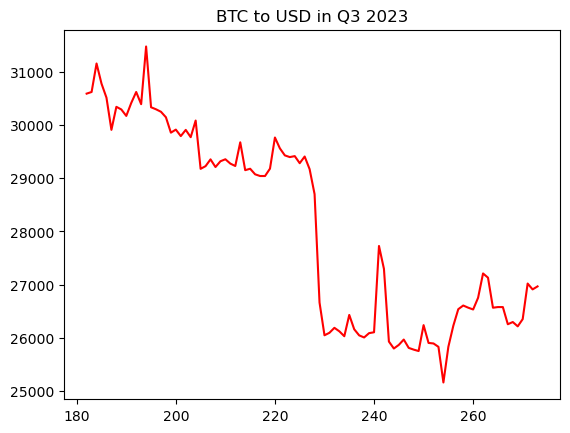

In [18]:
# Plotting the data
days = np.arange(182, 274)  # 182 denotes 1 July, and it continues up to 273
plt.plot(days, q3_rates, color='red')

# Adding title and labels
plt.title('BTC to USD in Q3 2023')

# Display the plot
plt.show()

In [21]:
# Extract the low and high data
q3_low = rates[181:273, 3]
q3_high = rates[181:273, 2]

# Find the day number with the lowest and highest observed prices
lowest_price_day = np.argmin(q3_low) + 182  # Adding 182 to get the actual day number
highest_price_day = np.argmax(q3_high) + 182  # Adding 182 to get the actual day number

# Find the corresponding prices
lowest_price = np.min(q3_low)
highest_price = np.max(q3_high)

# Display the results
print(f"Lowest price was on day {lowest_price_day} ({lowest_price:.2f}).")
print(f"Highest price was on day {highest_price_day} ({highest_price:.2f}).")

Lowest price was on day 254 (24930.30).
Highest price was on day 194 (31814.52).


I load min/max for the low/high column, and I find the min/max price according to these values.

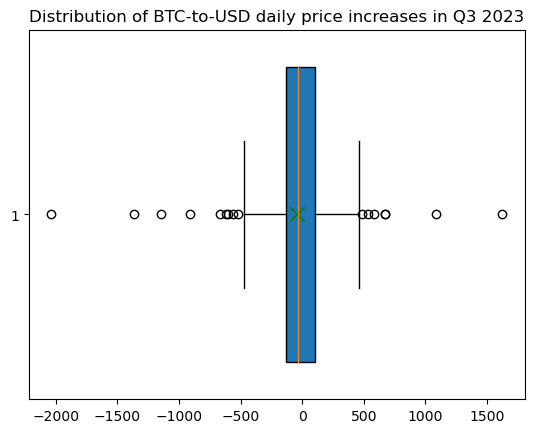

In [24]:
# Calculate daily price changes
price_changes = np.diff(q3_rates)

# Create a horizontal box-and-whisker plot
box_plot = plt.boxplot(price_changes, vert=False, widths=0.8, patch_artist=True)

# Mark the arithmetic mean with a green "x"
mean_price_change = np.mean(price_changes)
plt.plot(mean_price_change, 1, 'gx', markersize=10, label='Arithmetic Mean')

# Adding labels and title
plt.title('Distribution of BTC-to-USD daily price increases in Q3 2023')

# Display the plot
plt.show()

The box-and-whisker plot shows an overview of the distribution of daily price changes during Q3 2023. It shows the central tendency (median), spread (IQR), and potential outliers.

The green "x" provides a visual reference for the arithmetic mean of the daily price changes. Comparing the mean with the box-and-whisker plot helps understand how the average relates to the distribution.

In [26]:
# Calculate the first and third quartiles
q1 = np.percentile(price_changes, 25)
q3 = np.percentile(price_changes, 75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers using vectorized relational operators
outliers = (price_changes < lower_bound) | (price_changes > upper_bound)

# Count the number of outliers
outlier_count = np.sum(outliers)

# Display the results
print(f"Number of Outliers: {outlier_count}")

Number of Outliers: 16


Outliers could indicate unusual or extreme movements in the cryptocurrency's value on specific days. Outliers are values that deviate significantly from the typical or expected range of values in the dataset. Analysts often investigate outliers to determine whether they represent genuine market movements or if there are external factors influencing the data. Additionally, outliers may prompt further analysis to identify patterns or trends that could inform trading or investment strategies. They can also reflect the inherent volatility and complexity of financial markets. Analyzing outliers in conjunction with other relevant information and market context provides a more comprehensive understanding of the data.